# The purpose of this notebook is to get more knowledge about these datasets

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import string
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import spacy
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import string
from langdetect import detect

In [3]:
# VARIABLES:
pd.options.mode.chained_assignment = None
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
N = 10 # number of most common words/n-grams to rank
L = 3 # max L-gram in analysis

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Preliminary data analysis and Train/Test split

In [4]:
def detect_language_with_langdetect(text):
    lang = detect(text)
    return lang

In [5]:
df_merged = pd.read_csv("../data/merged_datasetes_balanced_huge.csv")
df_merged.shape

(40000, 10)

In [6]:
df_merged.loc[(df_merged["char_small"]<df_merged["char_capital"]) & (df_merged["clickbait"]==0)].shape

(6, 10)

In [7]:
# This cell executes up to ~1min

# detection with langid
# languages = df_merged["title"].apply(detect_language_with_langid)
# df_languages = pd.DataFrame(languages.tolist(), columns=['language', 'probability'])
# idx = df_languages.loc[df_languages["language"]!="en"].index

# detection with langdetect
languages_1 = df_merged["title"].apply(detect_language_with_langdetect)
idx_1 = df_merged["title"].loc[languages_1 != "en"].index

print("All titles with uncernities are in English: \n")
print(df_merged["title"].iloc[idx_1])

All titles with uncernities are in English: 

0        Boy arrested for murder after seventeen-year-o...
1        Canada unveils plans to legalise recreational ...
25               A 9,500-year-old skull gets a 3D makeover
28                       Roche Names Leaders for Genentech
61           Canada keeping eye on Deepwater Horizon spill
                               ...                        
39581                    No One Asked For Daylight Savings
39618    13 signs you have a work spouse, even if doesn...
39624              21 Best Ladies In Suits Moments Of 2015
39698              The 24 Cutest Reindeer You Ever Did See
39994                 Pigskin A Blanket: NFL Week 11 Picks
Name: title, Length: 1166, dtype: object


In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    df_merged["title"], 
    df_merged["clickbait"],
    test_size=0.2, 
    random_state=42,
    stratify=df_merged["clickbait"]
)

In [9]:
x_train_clickbait = x_train[y_train==1]
x_train_no_clickbait = x_train[y_train==0]

In [10]:
print(f"Min length: {min(df_merged["title"].apply(lambda x: len(x)))}")
print(f"Max length: {max(df_merged["title"].apply(lambda x: len(x)))}")

Min length: 12
Max length: 124


### N-grams Analysis

Sequence of "n" adjacent symbols or the words found in a language dataset in particular order.

In [11]:
def generate_N_grams(x_train, ngram=1):
    """
    Function generates n-gram
    """
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    lemmatizer = WordNetLemmatizer()
    words = x_train.str.split().explode().tolist()
    words_no_stop_words=[lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words and not word.isdigit()]
    temp=zip(*[words_no_stop_words[i:] for i in range(0,ngram)])
    n_grams_list=[' '.join(ngram) for ngram in temp]
    counter = Counter(n_grams_list)
    most_common_n_grams = counter.most_common(N)
    return most_common_n_grams

In [12]:
def remove_punctuation(text):
  """
  Removes punctuation
  """
  if(type(text)==float):
    return text
  res=""
  num_letters = len(text)
  for i in range(num_letters):     
    if text[i] in string.punctuation:
      if i + 1 < num_letters and not text[i+1].isspace():
         res+=" "
      continue
    res+=text[i]
  return res

In [13]:
def generate_N_grams_plot(df_clickbait_0, df_clickbait_1, ngram=1, all_0=1, all_1=1):
    fig, axes = plt.subplots(ncols=2, figsize=(14, 6))

    sns.barplot(y=df_clickbait_0['Word'].values[:N], x=df_clickbait_0['Frequency'].values[:N]/all_0, ax=axes[0], color='green')
    sns.barplot(y=df_clickbait_1['Word'].values[:N], x=df_clickbait_1['Frequency'].values[:N]/all_1, ax=axes[1], color='red')

    for i in range(2):
        axes[i].spines['right'].set_visible(False)
        axes[i].set_xlabel('Frequency', fontsize=12)
        axes[i].set_ylabel(f'{ngram}', fontsize=12)
        axes[i].tick_params(axis='x', labelsize=10)
        axes[i].tick_params(axis='y', labelsize=10)

    axes[0].set_title(f'Top {N} most common {ngram} in Non-Clickbait Titles', fontsize=15)
    axes[1].set_title(f'Top {N} most common {ngram} in Clickbait Titles', fontsize=15)

    plt.tight_layout()
    plt.show()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


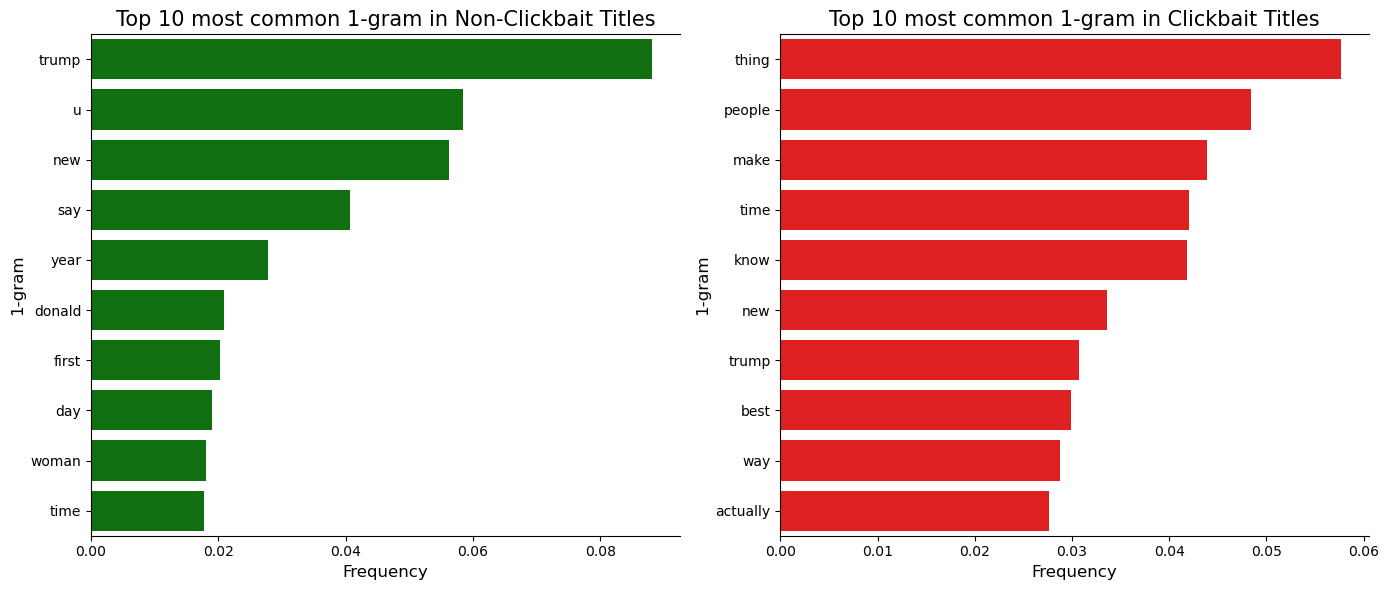

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


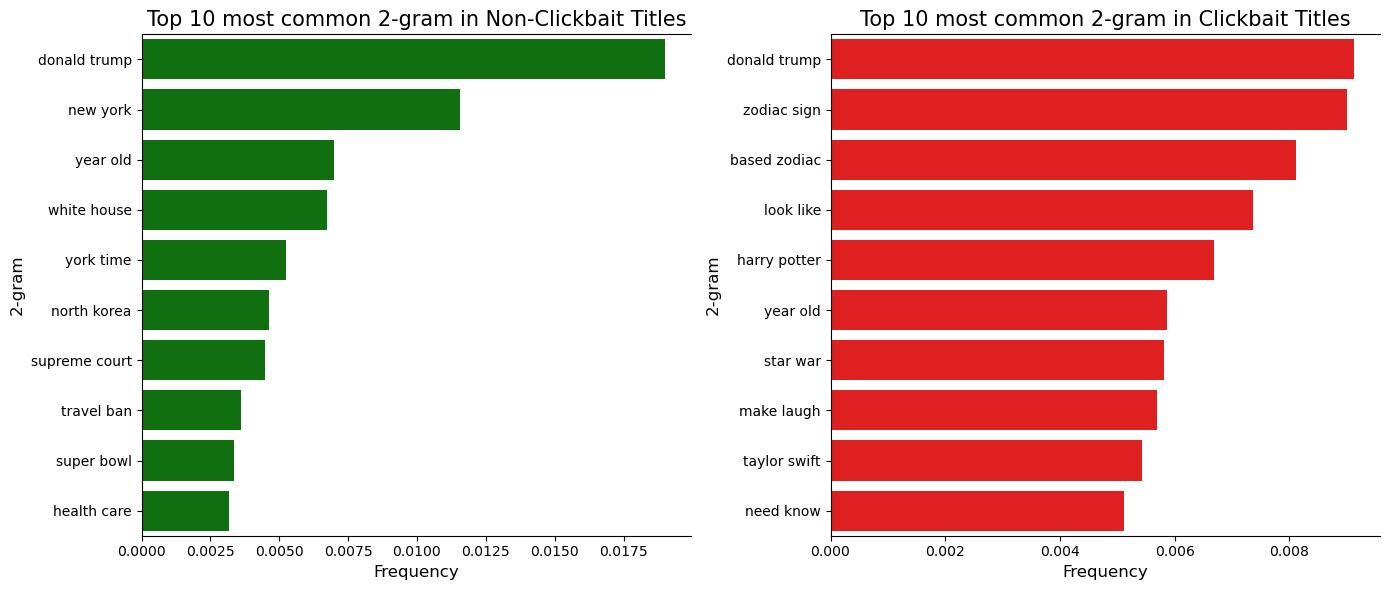

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


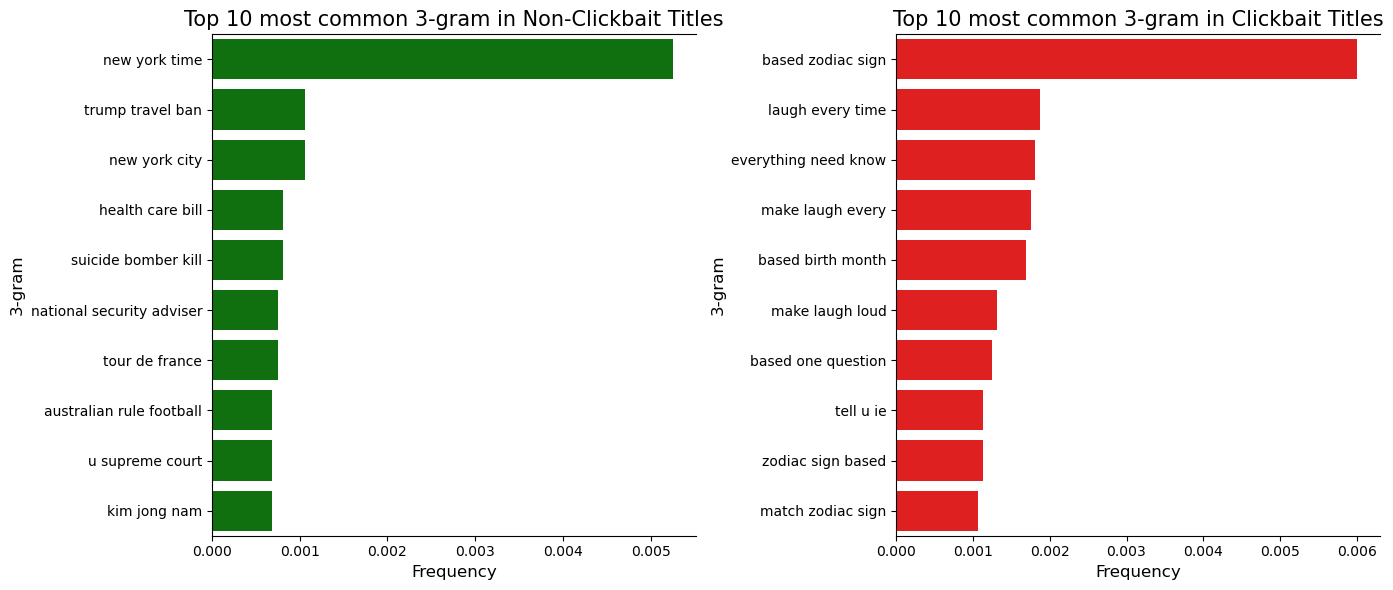

In [14]:
x_train_clickbait = x_train_clickbait.apply(lambda x: remove_punctuation(x))
x_train_no_clickbait = x_train_no_clickbait.apply(lambda x: remove_punctuation(x))
for i in range(1, L+1):
    df_clickbait_1 = pd.DataFrame(generate_N_grams(x_train_clickbait, ngram=i), columns=['Word', 'Frequency'])
    df_clickbait_0 = pd.DataFrame(generate_N_grams(x_train_no_clickbait, ngram=i), columns=['Word', 'Frequency'])
    generate_N_grams_plot(df_clickbait_0, df_clickbait_1, ngram=f"{i}-gram", all_0=len(x_train_no_clickbait), all_1=len(x_train_clickbait))
    

1-grams: Both clickbait articles and no-clickbait articles frequently refers to politics. As a difference between them is a "video" frequently mentioned in clickbait titles to tempt potential users.

2-grams: Analysis shows that the word "subscription" is common in non-clickbait sources. It makes sense since paid sources should be more trustfull. Clickbait titles use names of popular organisations like "Black Lives Matter". They try to drive reader's attention by addressing highly personal information by "based on your", "your zodiac sign", or giving advices: "you need to".

## Token Analysis by set

In [15]:
def calculate_avg_token(df):
    df = df["title"].apply(lambda x: remove_punctuation(x))
    tokens = pd.DataFrame(generate_N_grams(df, ngram=1), columns=['word', 'frequency'])  
    tokens["length"] = tokens["word"].apply(lambda x: len(x))
    weighted_length_sum = (tokens["length"] * tokens["frequency"]).sum()
    total_frequency = tokens["frequency"].sum()
    avg_token_length = weighted_length_sum / total_frequency
    return avg_token_length

In [16]:
titles_by_set = []
for i in range(1,4):
    titles_by_set.append(df_merged.loc[df_merged["set"]==i])
avg_tokens = []
for titles in titles_by_set:
    avg_tokens.append(calculate_avg_token(titles))
avg_tokens

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[4.25096928124068, 3.928396871945259, 4.032834379526799]

## Stop words analysis

In [17]:
def count_stop_words(x_train):
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    lemmatizer = WordNetLemmatizer()
    words = x_train.str.split().explode().tolist()
    cumulated_stop_words=[lemmatizer.lemmatize(word.lower()) for word in words if word.lower() in stop_words]
    counter = Counter(cumulated_stop_words)
    return counter.items()

In [18]:
stop_words_clickbait_1 = pd.DataFrame(count_stop_words(x_train_clickbait), columns=['Word', 'Frequency'])
stop_words_clickbait_1 = stop_words_clickbait_1.sort_values(by="Frequency", ascending=False).reset_index(drop=True)
stop_words_clickbait_0 = pd.DataFrame(count_stop_words(x_train_no_clickbait), columns=['Word', 'Frequency'])
stop_words_clickbait_0 = stop_words_clickbait_0.sort_values(by="Frequency", ascending=False).reset_index(drop=True)
mean_clickbait_0 = stop_words_clickbait_1["Frequency"].sum()/x_train_clickbait.shape[0]
mean_clickbait_1 = stop_words_clickbait_0["Frequency"].sum()/x_train_no_clickbait.shape[0]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [19]:
print(f"Mean of stopwords in clickbait: {mean_clickbait_0}")
print(f"Mean of stopwords in no-clickbait: {mean_clickbait_1}")

Mean of stopwords in clickbait: 4.060125
Mean of stopwords in no-clickbait: 2.6369375


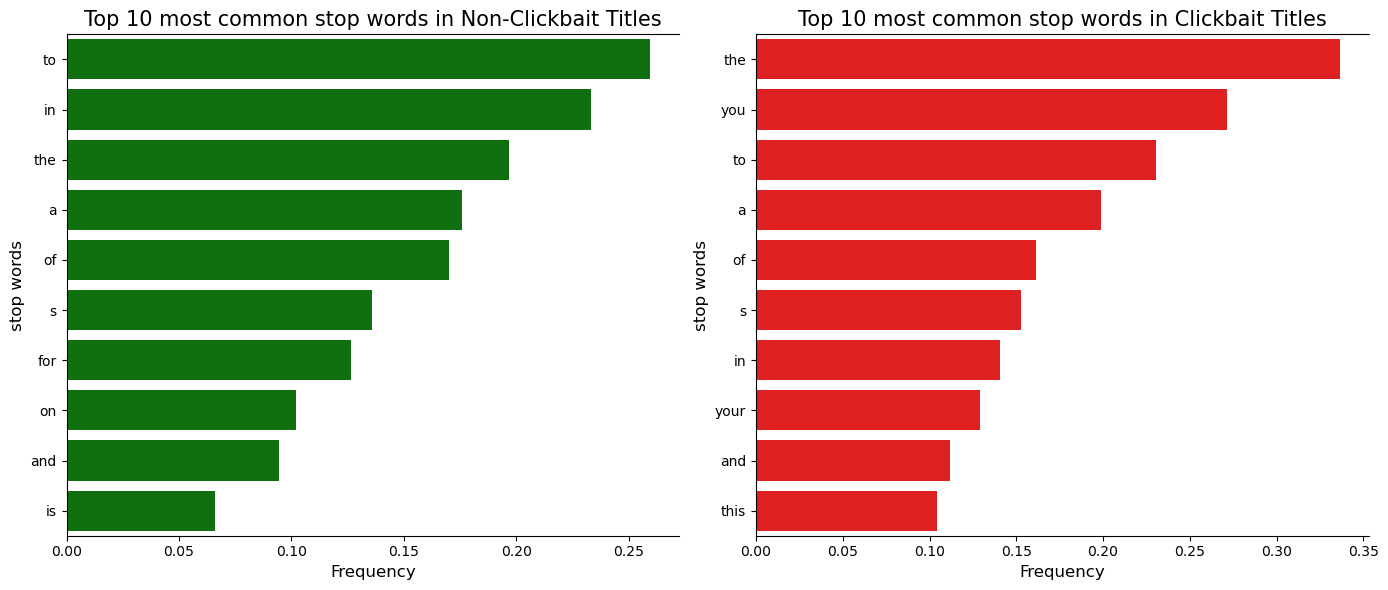

In [20]:
generate_N_grams_plot(stop_words_clickbait_0, stop_words_clickbait_1, ngram="stop words", all_0=len(x_train_no_clickbait), all_1=len(x_train_clickbait))

They are way more stopwords by article in clickbait than in valid articles. In clickbait occurs more often stopwords like you/yours which indicates persuasive language.

## Named Entity Recognition (NER)
NER identifies predefined categories of words in sentences.

### Example:
*John Smith uses iPhone 11 while going to Toronto.*

- **John Smith** - Person
- **iPhone 11** - Product
- **Toronto** - Location

In [21]:
# ner_train_merged = pd.DataFrame({"title":x_train, "clickbait":y_train})
ner_train_merged = df_merged

In [22]:
def extract_named_entities(text):
    """
    Extracts entities from text. Returns dictionary with the count of each entity type.
    """
    doc = nlp(text)
    entities = {}
    for entity in doc.ents:
        if entity.label_ in entities:
            entities[entity.label_] += 1
        else:
            entities[entity.label_] = 1.0
    return entities


In [23]:
# This cell executes up to ~2min
nlp = spacy.load('en_core_web_sm')
num_clickbaits = len(ner_train_merged.loc[ner_train_merged["clickbait"]==0])
num_no_clickbaits = len(ner_train_merged.loc[ner_train_merged["clickbait"]==1])
extracted_entities = ner_train_merged["title"].apply(extract_named_entities)
entities_df = pd.DataFrame(list(extracted_entities))
ner_train_merged = ner_train_merged[["clickbait"]].join(entities_df).fillna(0.0)
grouped = ner_train_merged.groupby("clickbait").sum()
grouped = grouped.transpose()
grouped[1] = grouped[1]/num_clickbaits
grouped[0] = grouped[0]/num_no_clickbaits

In [24]:
def classify(row):
    """
    vote for the option where the measurement is greater by 5%
    """
    if row[0]/row[1] > 1.05:
        return 0
    elif row[1]/row[0] > 1.05:
        return 1
    else:
        return 0.5

In [26]:
# ordering
grouped["total"] = grouped[0] + grouped[1]

# classification of entities as clickbait supportive or not
grouped["class"] = grouped.apply(classify, axis=1)
grouped = grouped.sort_values("total", ascending=False)
print(f"Clickbait supportive: {grouped.index[grouped['class'] == 1].to_list()}")
print(f"Neutral: {grouped.index[grouped['class'] == 0.5].to_list()}")
print(f"Valid article supportive: {grouped.index[grouped['class'] == 0].to_list()}")
grouped = grouped.drop(columns=["total", "class"])
grouped = grouped.loc[grouped["total"]>0.01]

Clickbait supportive: ['CARDINAL', 'DATE', 'WORK_OF_ART', 'EVENT']
Neutral: ['TIME']
Valid article supportive: ['ORG', 'PERSON', 'GPE', 'NORP', 'LOC', 'MONEY', 'ORDINAL', 'FAC', 'PRODUCT', 'PERCENT', 'LAW', 'QUANTITY', 'LANGUAGE']


KeyError: 'total'

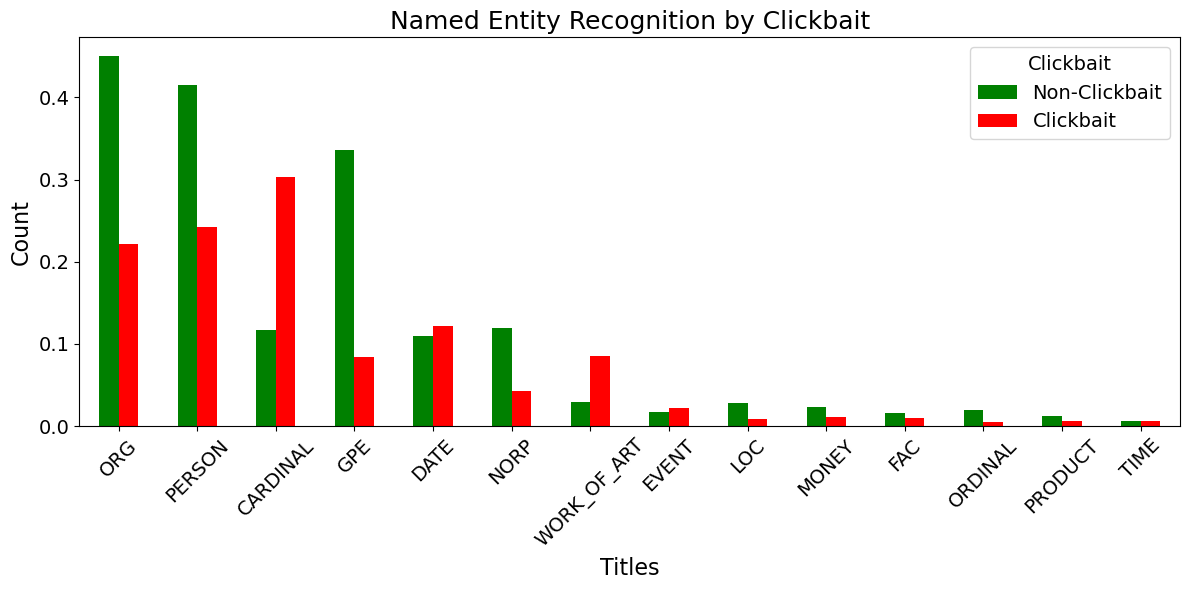

In [97]:
def ner_plot(df_grouped):
    # NER plot
    FONT_TITLE = 18
    FONT_LABEL = 16
    FONT_LEGEND = 14

    colors = ['green', 'red']
    ax = df_grouped.plot(kind='bar', figsize=(12, 6), color=colors)

    plt.title('Named Entity Recognition by Clickbait', fontsize=FONT_TITLE)  
    plt.xlabel('Titles', fontsize=FONT_LABEL)                                 
    plt.ylabel('Count', fontsize=FONT_LABEL)                                 
    ax.legend(title='Clickbait', title_fontsize=FONT_LEGEND, fontsize=FONT_LEGEND, labels=['Non-Clickbait', 'Clickbait'])

    plt.xticks(rotation=45, fontsize=FONT_LEGEND)                             
    plt.yticks(fontsize=FONT_LEGEND)                                          

    plt.tight_layout()
    plt.show()

ner_plot(grouped)

| **Entity**      | **Description**                                                                                  | **Example**                      |
|-----------------|--------------------------------------------------------------------------------------------------|-----------------------------------|
| **ORG**         | Organizations — refers to entities that are organizations such as companies, institutions, or agencies. | Apple, UN                        |
| **GPE**         | Geopolitical Entities — refers to entities that are geographical or political regions such as countries, cities, or states. | USA, Berlin                      |
| **PERSON**      | Person — refers to individual people or characters.                                               | Barack Obama, Elon Musk           |
| **CARDINAL**    | Numerals that do not fall under other numeric types.                                              | three, 1,000                     |
| **NORP**        | Nationalities, religious or political groups.                                                     | American, Christian, Democrat     |
| **PRODUCT**     | Objects, vehicles, foods, etc., that are products.                                                | iPhone, Boeing 737                |
| **DATE**        | Absolute or relative dates or periods.                                                            | July 4th, next week               |
| **ORDINAL**     | First, second, etc.                                                                               | first, third                     |
| **PERCENT**     | Percentage (including the “%” sign).                                                             | 50%, ten percent                 |
| **FAC**         | Facilities — buildings, airports, highways, bridges, etc.                                         | Eiffel Tower, JFK Airport         |
| **EVENT**       | Named events.                                                                                     | Olympics, World War II            |
| **WORK_OF_ART** | Titles of books, songs, etc.                                                                      | The Mona Lisa, The Catcher in the Rye |
| **TIME**        | Times smaller than a day.                                                                         | 2 PM, morning                    |
| **MONEY**       | Monetary values, including unit.                                                                  | $500, €20 million                |
| **LOC**         | Locations that are not geopolitical entities, like mountain ranges, bodies of water, etc.         | Mount Everest, Pacific Ocean      |
| **LAW**         | Named documents made into laws.                                                                   | First Amendment, The Constitution |
| **QUANTITY**    | Measurements, as of weight or distance.                                                           | 7kg, 200 miles                   |
| **LANGUAGE**    | Any named language.                                                                               | English, Spanish                 |

## Sentiment Analysys
The ***polarity*** score is a float within the range [-1.0, 1.0]. Results close to -1 are negative texts while texts close to 1 are positive one. </br>
The ***subjectivity*** is a float within the range [0.0, 1.0] where 0 is objective and 1.0 is subjective.

In [98]:
sa_train_merged = pd.concat([x_train, y_train], axis=1)
sa_train_merged["polarity"] = sa_train_merged["title"].apply(lambda title: TextBlob(title).sentiment.polarity)
sa_train_merged["subjectivity"] = sa_train_merged["title"].apply(lambda title: TextBlob(title).sentiment.subjectivity)

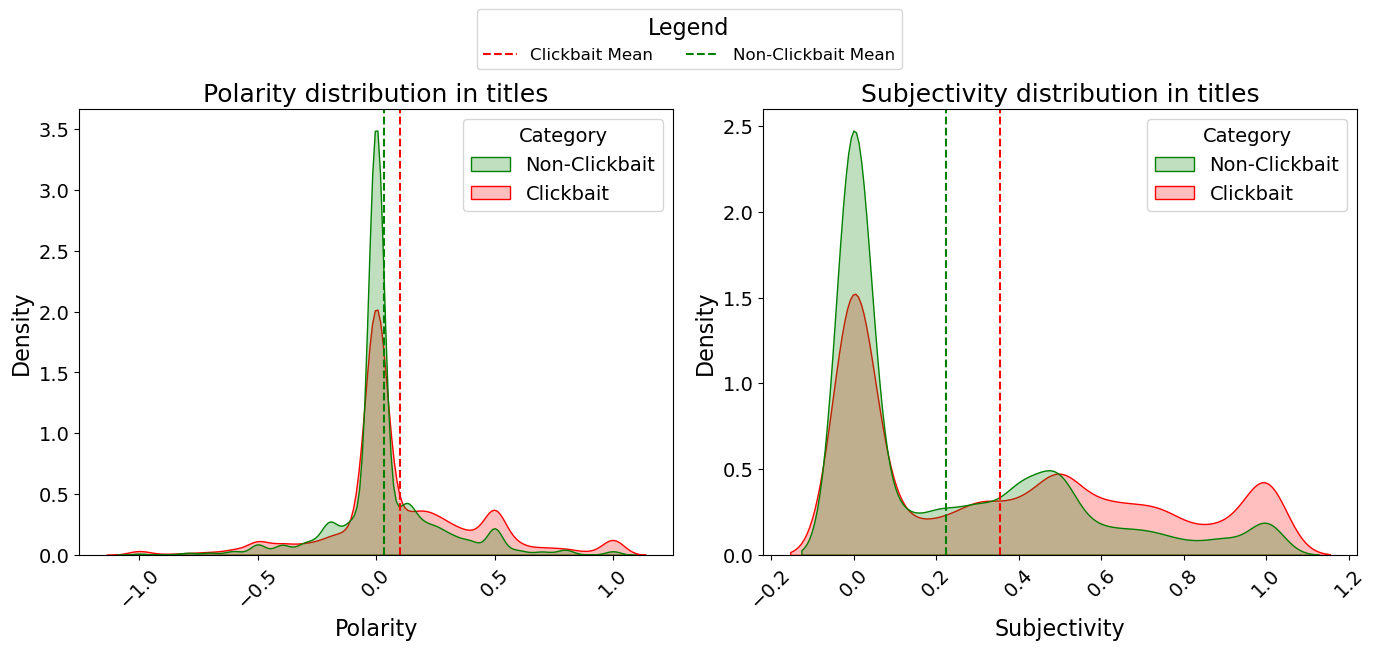

In [113]:
# Replace 0 and 1 with 'Non-Clickbait' and 'Clickbait' for easier plotting
sa_train_merged['Category'] = sa_train_merged['clickbait'].replace({0: 'Non-Clickbait', 1: 'Clickbait'})

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

clickbait_means = sa_train_merged[["subjectivity", "polarity", "Category"]].groupby("Category").mean()

custom_palette = {"Clickbait": "red", "Non-Clickbait": "green"}
plt.rcParams.update({'font.size': 14})

# Plot polarity distribution with clickbait means
sns.kdeplot(data=sa_train_merged[["polarity", "Category"]], x="polarity", hue="Category", fill=True, bw_adjust=1, 
            palette=custom_palette, ax=axes[0])
axes[0].axvline(clickbait_means.loc['Clickbait', 'polarity'], color='red', linestyle='--', label='Clickbait Mean')
axes[0].axvline(clickbait_means.loc['Non-Clickbait', 'polarity'], color='green', linestyle='--', label='Non-Clickbait Mean')
axes[0].set_xlabel("Polarity", fontsize=16)
axes[0].set_ylabel("Density", fontsize=16)
axes[0].set_title("Polarity distribution in titles", fontsize=18)
axes[0].tick_params(axis='x', rotation=45, labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)

# Plot subjectivity distribution with clickbait means
sns.kdeplot(data=sa_train_merged[["subjectivity", "Category"]], x="subjectivity", hue="Category", fill=True, bw_adjust=1, 
            palette=custom_palette, ax=axes[1])
axes[1].axvline(clickbait_means.loc['Clickbait', 'subjectivity'], color='red', linestyle='--', label='Clickbait Mean')
axes[1].axvline(clickbait_means.loc['Non-Clickbait', 'subjectivity'], color='green', linestyle='--', label='Non-Clickbait Mean')
axes[1].set_xlabel('Subjectivity', fontsize=16)
axes[1].set_ylabel("Density", fontsize=16)
axes[1].set_title("Subjectivity distribution in titles", fontsize=18)
axes[1].tick_params(axis='x', rotation=45, labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4, title="Legend", fontsize=12, title_fontsize=16)
plt.tight_layout()
plt.show()



### Sentiment Analysis conclusions:
Both clickbait and non-clickbait articles have polarity centered around 0. However, clickbaits articles distribution has heavier tails. Clickbait articles have greater values for subjectivity than non-clickbait. There is a significant difference in means.
It shows that semantics of clickbait titles is extreme more often than in valuable titles. Text might be either strongly negative or positive. Clickbait titles are also more subjective.